<a href="https://colab.research.google.com/github/ola-sumbo/Car-frontend/blob/master/AXA_Vehicle_Insurance_Claim_'OlasumboB'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries for Visualisation and ML**

In [1]:
#for data visualization
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import missingno as mssno
seed=45

In [2]:
#for ML
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

**Data Loading and Preparation**
We load our data and explore data, this time separately

In [5]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv


In [6]:
train = pd.read_csv('/content/Train (1).csv')
test = pd.read_csv('/content/Test (1).csv')

In [13]:
ssn = pd.read_csv('/content/SampleSubmission.csv')

In [111]:
# join train and test together
ntrain = train.shape[0]
ntest = test.shape[0]

In [ ]:
#Displaying Files
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [8]:
# display test
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,009D84L,2010-04-24,2011-03-27,NO GENDER,25,2010-04-24,1,NaN,As Attached,Iveco,Victoria Island,Lagos,CVTP
1,01DO2EQ,2010-01-01,2010-12-31,NaN,120,2010-01-01,4,NaN,As Attached,TOYOTA,Victoria Island,Lagos,Muuve
2,01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
3,024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
4,02BYET3,2010-09-16,2010-12-31,NaN,120,2010-09-16,4,NaN,NaN,TOYOTA,Victoria Island,Lagos,Muuve


In [9]:
#Number of rows and columns
train.shape
#test.shape

(12079, 14)

In [10]:
#Description
train.describe()

,Age,No_Pol,target
count,12079.000000,12079.000000,12079.000000
mean,42.234539,1.307227,0.120457
std,97.492565,0.733085,0.325509
min,-6099.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000
50%,41.000000,1.000000,0.000000
75%,50.000000,1.000000,0.000000
max,320.000000,10.000000,1.000000


In [11]:
#Data Types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


**Finding Null Values in the dataset**

In [12]:
#Finding the nul values as null value and filling with interpolate
train.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [14]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")
for ColName in train[['State','Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make','LGA_Name','target']]:
  print("{} = {}".format(ColName, len(train[ColName].unique())))

Number of Categories in: 
State = 112
Gender = 8
Car_Category = 17
Subject_Car_Colour = 46
Subject_Car_Make = 75
LGA_Name = 259
target = 2


In [15]:
train.target.unique()

array([0, 1])

**Guide to missing data dealings[link text](https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893)**

Dealing with missing data by creating a new category to avoid variance inflation.

In [ ]:
#Frequent Categorical Imputation another method for class purposes 
#1. Function to replace NAN values with mode value
#def impute_nan_most_frequent_category(Dataframe,ColName):
    # .mode()[0] - gives first category name
     #most_frequent_category=Dataframe[ColName].mode()[0]
    
    # replace nan values with most occured category
     #Dataframe[ColName + "_Imputed"] = Dataframe[ColName]
     #Dataframe[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [ ]:
#2. Call function to impute most occured category
#for Columns in ['State','Gender','Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make','LGA_Name','target']:
  #impute_nan_most_frequent_category(all_data,Columns)
    
# Display imputed result
#all_data[['State','State_Imputed','Gender','Gender_Imputed','Car_Category',
       #'Car_Category_Imputed', 'Subject_Car_Colour','Subject_Car_Colour_Imputed', 'Subject_Car_Make_Imputed','Subject_Car_Make_Imputed','LGA_Name','LGA_Name_Imputed','target', 'target_Imputed']].head(10)

#all_data 

In [ ]:
#3. Drop actual columns
#all_data = all_data.drop(['State','Gender','Car_Category', 'Subject_Car_Colour','target' ,'Subject_Car_Make','LGA_Name'], axis = 1)

**By Creating another category begins**

In [16]:
#1. Function to impute null value with new category
def impute_nan_create_category(train,ColName):
     train[ColName] = np.where(train[ColName].isnull(),"Unknown",train[ColName])
## Call function to create new category for variables
for Columns in ['State','Gender','Car_Category', 'Subject_Car_Colour' ,'Subject_Car_Make','LGA_Name']:
    impute_nan_create_category(train,Columns)
#2. Display result
train[['State','Gender','Car_Category', 'Subject_Car_Colour','Subject_Car_Make','LGA_Name']].head(10)

,State,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name
0,Unknown,Male,Saloon,Black,TOYOTA,Unknown
1,Unknown,Female,JEEP,Grey,TOYOTA,Unknown
2,Unknown,Male,Saloon,Red,TOYOTA,Unknown
3,Unknown,Male,Unknown,Unknown,Unknown,Unknown
4,Lagos,Entity,Unknown,Unknown,Unknown,Lagos
5,Unknown,Male,Unknown,Unknown,Unknown,Unknown
6,Lagos,Female,Unknown,Unknown,Unknown,Ikeja
7,Unknown,Male,Saloon,Unknown,TOYOTA,Unknown
8,Benue,Female,JEEP,Black,REXTON,Badagry
9,Eti-Osa,Female,Unknown,Unknown,Unknown,Eti-Osa


In [ ]:
#train.isnull().sum()

**Treat missing values for test set this time**

[link text](https://github.com/GDhasade/Medium.com_Contents/blob/master/Handle_Categorical_Missing_Data.ipynb//)

In [17]:
#test.isnull().sum()              same missing column as above

In [18]:
#1. Function to impute null value with new category
def impute_nan_create_category(test,ColName):
     test[ColName] = np.where(test[ColName].isnull(),"Unknown",test[ColName])
## Call function to create new category for variables
for Columns in ['State','Gender','Car_Category', 'Subject_Car_Colour' ,'Subject_Car_Make','LGA_Name']:
    impute_nan_create_category(test,Columns)
#2. Display result
test[['State','Gender','Car_Category', 'Subject_Car_Colour','Subject_Car_Make','LGA_Name']].head(10)

,State,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name
0,Lagos,NO GENDER,Unknown,As Attached,Iveco,Victoria Island
1,Lagos,Unknown,Unknown,As Attached,TOYOTA,Victoria Island
2,Abuja-Municipal,Female,Unknown,Unknown,Ford,Abuja Municipal
3,Benue,Male,Unknown,Unknown,Unknown,Kosofe
4,Lagos,Unknown,Unknown,Unknown,TOYOTA,Victoria Island
5,Abuja,Female,Saloon,Black,Honda,Wuse 11
6,Unknown,Female,Saloon,Unknown,TOYOTA,Unknown
7,Lagos,Unknown,Saloon,Red,Hyundai,Victoria Island
8,Unknown,Female,JEEP,Unknown,TOYOTA,Unknown
9,Unknown,Male,JEEP,Unknown,ACURA,Unknown


**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


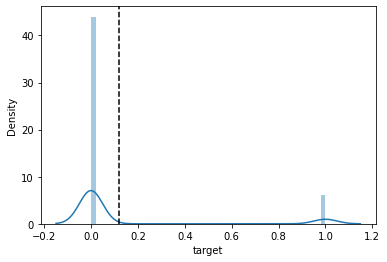

In [19]:
# Distribution of targets and mean 
sns.distplot(train['target'])
plt.axvline(train['target'].mean(), color="k", linestyle="--")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


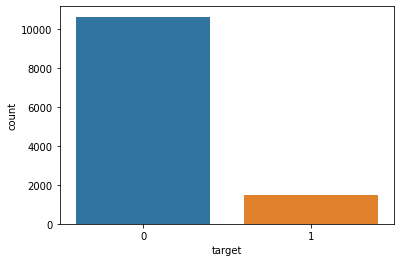

In [20]:
sns.countplot(train.target)

In [21]:
date_col = ['Policy Start Date','Policy End Date','First Transaction Date']
num_col = ['Age', 'No_Pol']
id_col = ['ID']
cat_col = [col for col in train.columns if col not in date_col+num_col+id_col]
cat_col

['Gender',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName',
 'target']

In [ ]:
def check_categorical_relationship(cat_col,y_col,df):
    for feat in cat_col:
        plt.figure(figsize=(20,5))
        sns.barplot(df[feat],df[y_col])
        plt.show()
        print("\n \n \n ")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


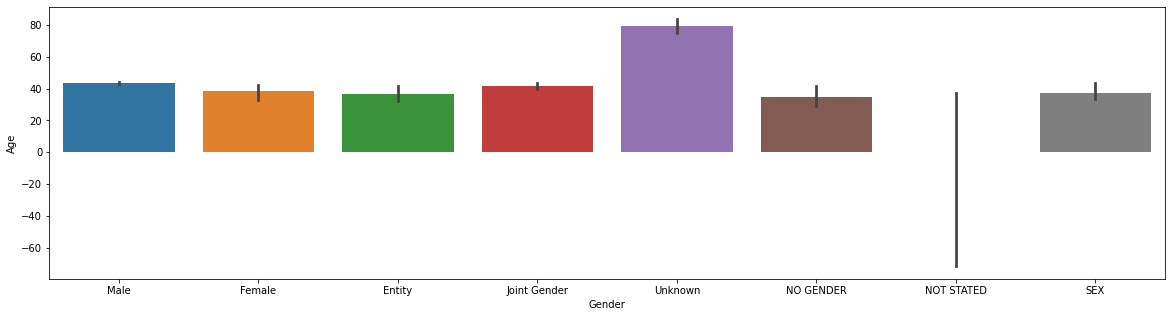

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


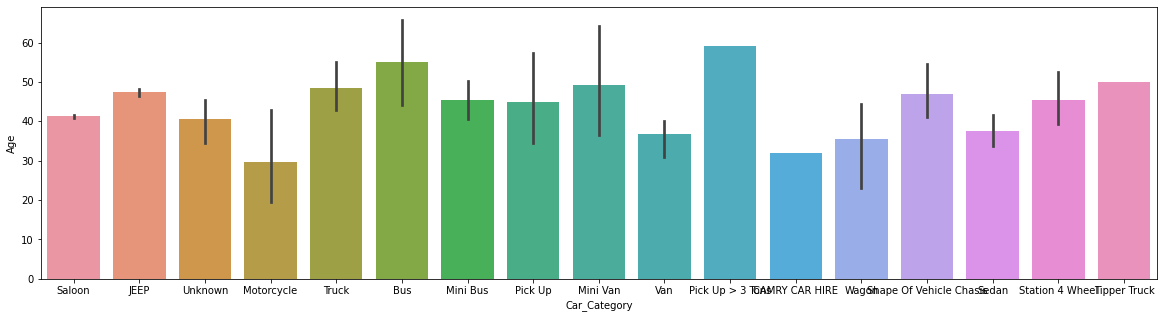

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


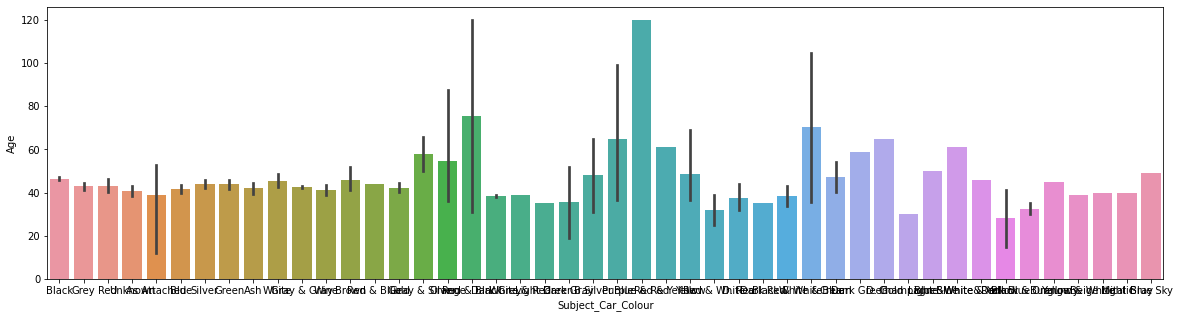

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


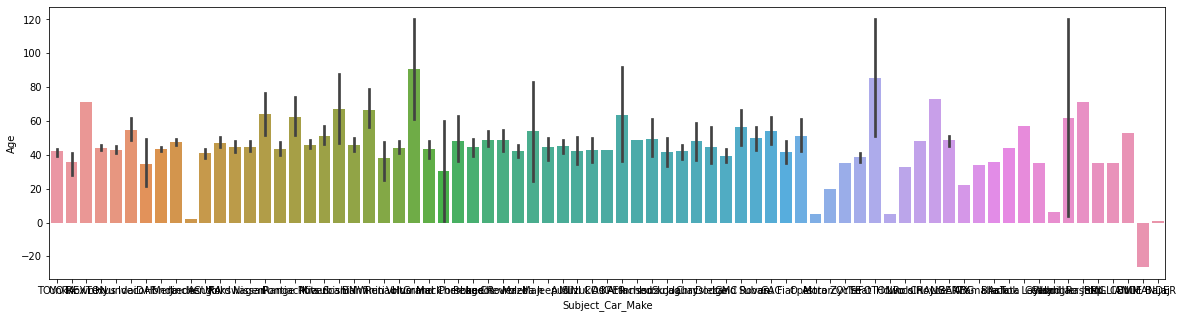

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


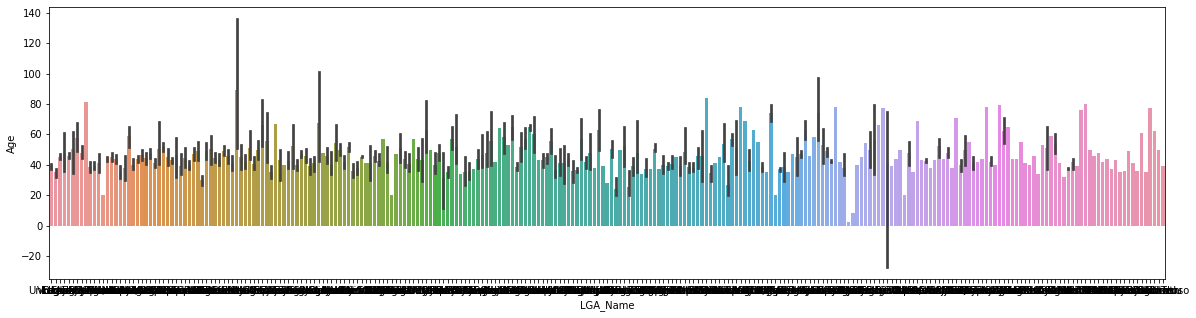

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


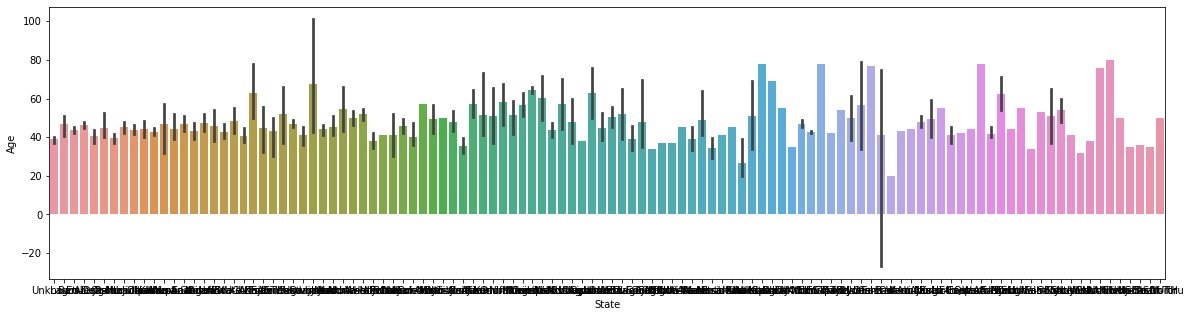

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


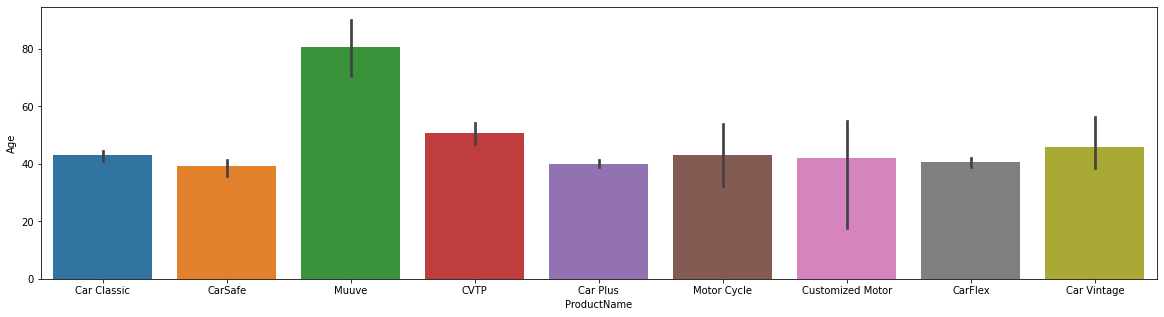

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


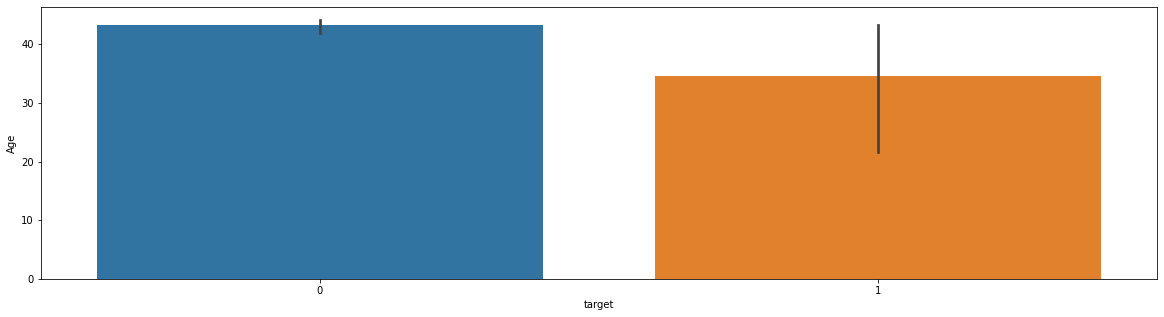

In [ ]:
check_categorical_relationship(cat_col,'Age',train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


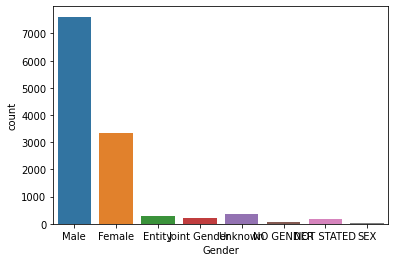

In [ ]:
# Gender distribution 
sns.countplot(train.Gender)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

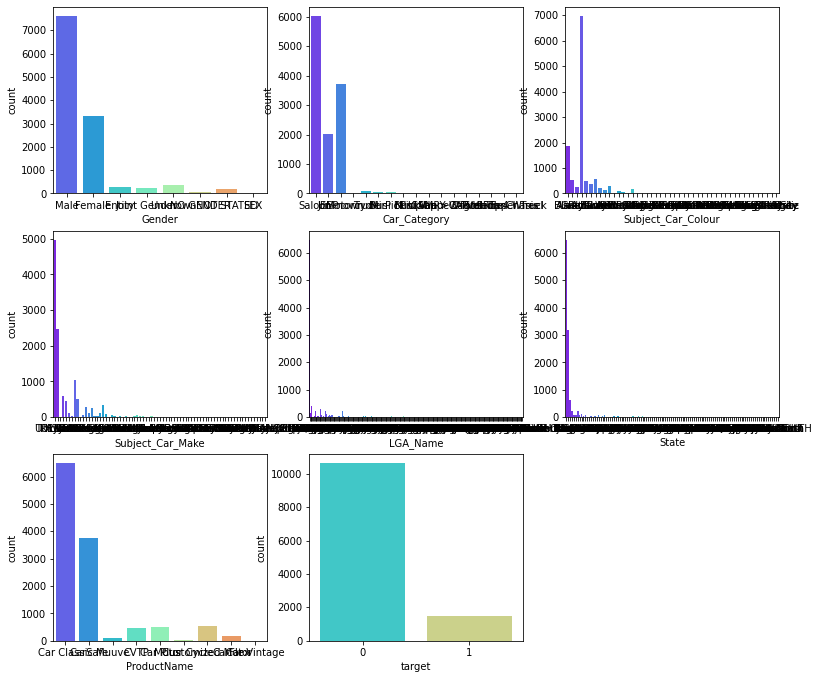

In [22]:
#Categorical values visualization
plt.figure(figsize=(13,24))
for i, c in enumerate(cat_col):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(train[c],palette='rainbow')

In [24]:
train.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', 'Unknown', 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

In [23]:
# we check for cardinality and look for outliers
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))
# cardinality of train is always higher than that of test

For column ID cardinality in Train minus cardinality in Test equals: 6902
For column Policy Start Date cardinality in Train minus cardinality in Test equals: 20
For column Policy End Date cardinality in Train minus cardinality in Test equals: 9
For column Gender cardinality in Train minus cardinality in Test equals: 0
For column First Transaction Date cardinality in Train minus cardinality in Test equals: 20
For column Car_Category cardinality in Train minus cardinality in Test equals: 2
For column Subject_Car_Colour cardinality in Train minus cardinality in Test equals: 8
For column Subject_Car_Make cardinality in Train minus cardinality in Test equals: 21
For column LGA_Name cardinality in Train minus cardinality in Test equals: 65
For column State cardinality in Train minus cardinality in Test equals: 30
For column ProductName cardinality in Train minus cardinality in Test equals: 0


**Basic Data Pre-Processing**

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)

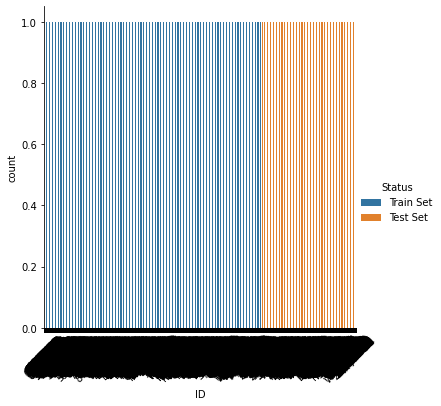

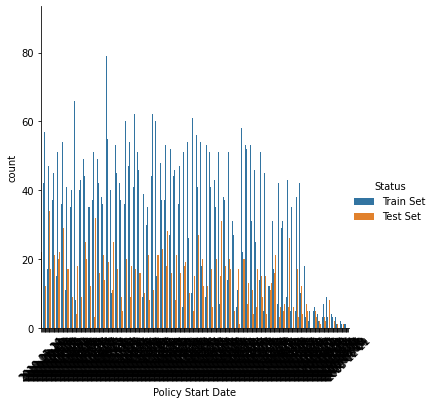

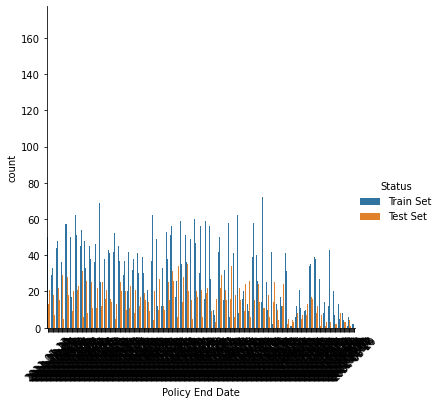

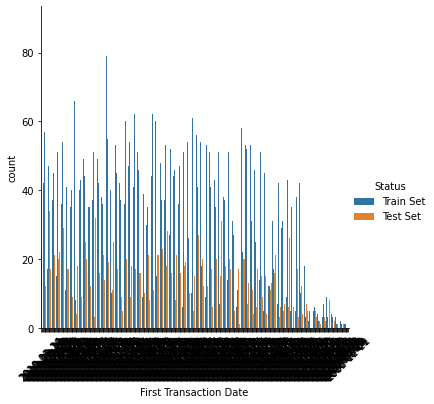

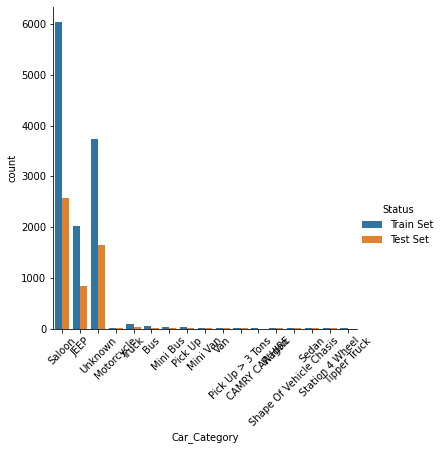

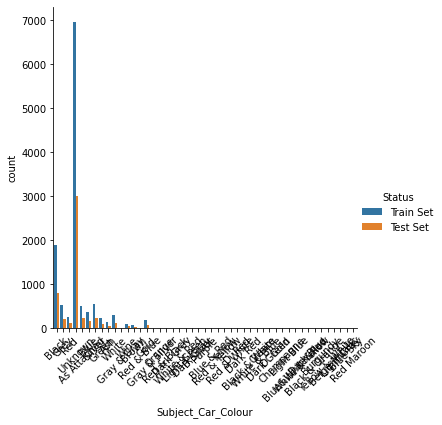

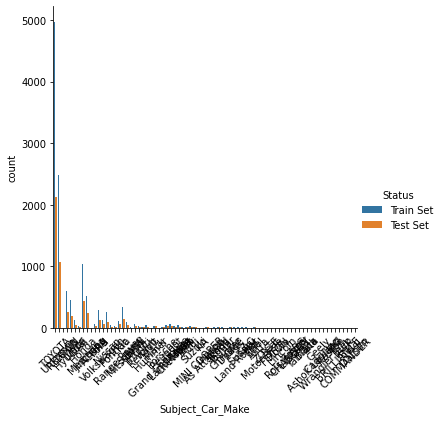

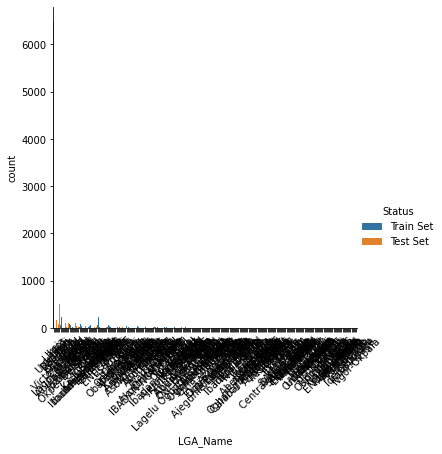

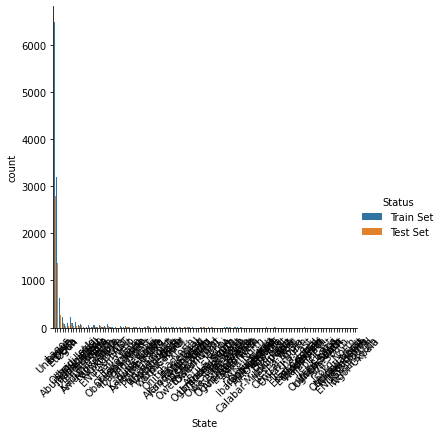

In [ ]:
# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

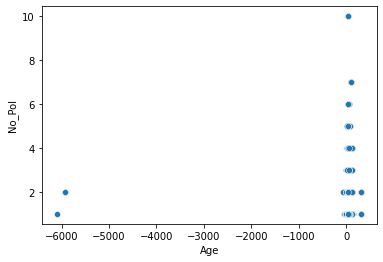

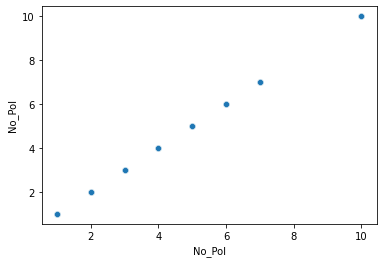

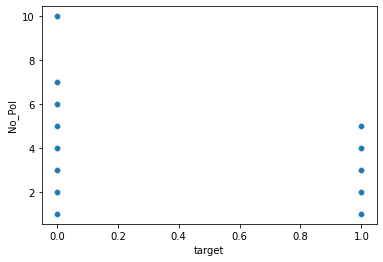

In [ ]:
# Scatterplots: numeric columns vs. target in the train set 
# numeric columns
digit_cols = train.select_dtypes(include=['float64','int64']).columns.to_list()
# scatter plots: digit_cols vs. target

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'No_Pol', data = train)

In [ ]:
# turning object columns into category columns
for i in train.select_dtypes(include='object').columns.to_list():
    train[i] = train[i].astype('category')

In [ ]:
# list w/ categorical variables
cater_cols = train.select_dtypes(include='category').columns.to_list()

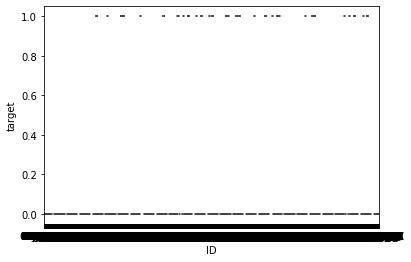

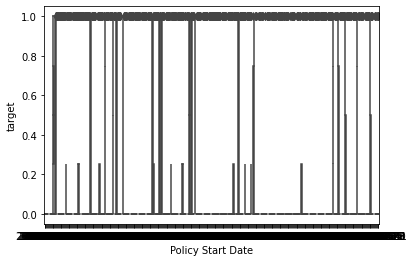

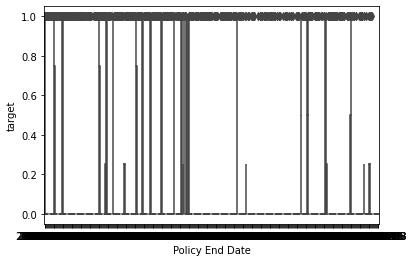

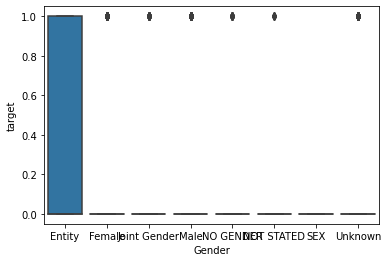

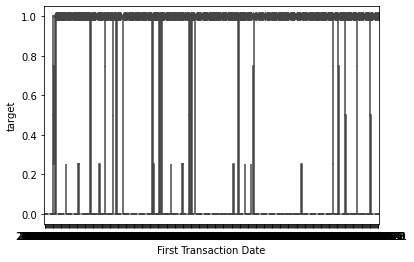

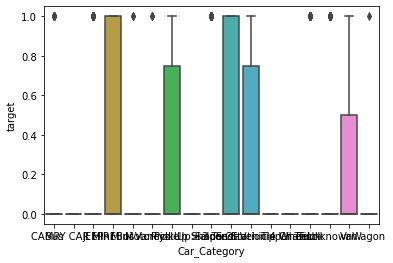

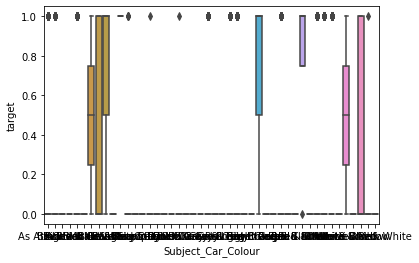

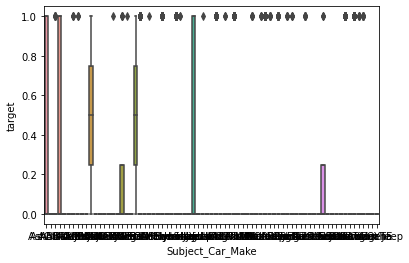

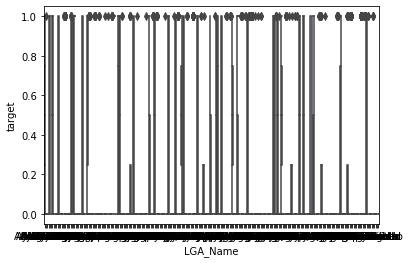

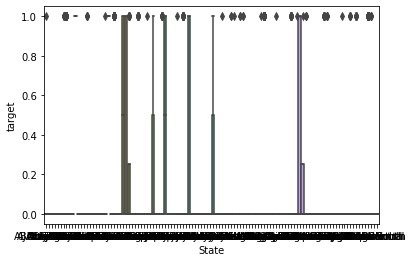

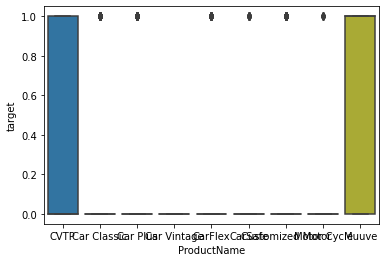

In [ ]:
# categorical variables vs. target TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'target', data = train)

In [27]:
train_1 = train.copy()
train_1.drop(labels = 'target', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'

In [25]:
date_col

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

In [28]:
for feat in date_col:
    train_1[feat] = pd.to_datetime(train_1[feat])

In [29]:
for i in train_1.select_dtypes(include='category').columns.to_list():
    train_1[i] = train_1[i].astype('object')

In [30]:
#and for the train set
train_1['Newtransact Y/N'] = np.where(train_1['Policy Start Date'] ==train_1['First Transaction Date'], 'No', 'Yes')
# Now we subtract
train_1['Age of policy'] = pd.to_datetime(train_1['Policy End Date']) - pd.to_datetime(train_1['Policy Start Date'])
train_1['Age of policy'] = train_1['Age of policy'].dt.days.astype(float) + (train_1['Age of policy'].dt.seconds.astype(float) / 86400)
train_1['Newtransact Y/N'] = train_1['Newtransact Y/N'].astype('category')

In [31]:
# Remove variables that were used to create new features
cols_2_remove = ['Policy Start Date','Policy End Date', 'First Transaction Date']
train_rem = train.copy()
train_rem.drop(cols_2_remove, axis = 1, inplace = True)
train_1.drop(cols_2_remove, axis=1, inplace=True)

**Correlation**

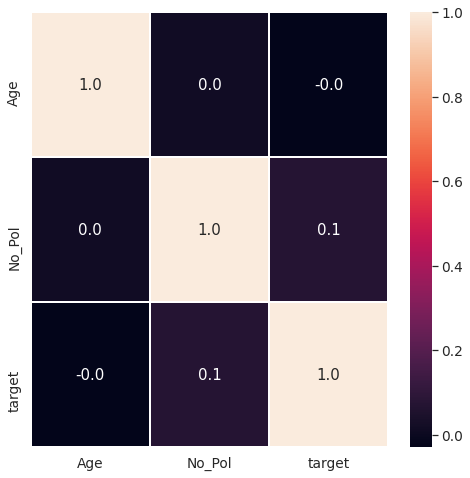

In [ ]:
# rebuilding the correlation map for the new dataset
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(train_rem.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [ ]:
train_rem.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,ID,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
ID,1.000000,-0.001702,-0.004126,-0.005017,-0.004442,0.007099,0.010668,0.028169,0.008536,0.002588,0.003178
Gender,-0.001702,1.000000,-0.012410,0.042152,0.089265,0.013565,0.025224,-0.025690,-0.015956,0.106732,0.007749
Age,-0.004126,-0.012410,1.000000,0.015527,0.015290,-0.002621,0.031482,0.033066,0.020363,-0.020460,-0.014391
No_Pol,-0.005017,0.042152,0.015527,1.000000,0.084599,-0.032014,0.078080,0.124409,0.102474,0.136401,0.060318
Car_Category,-0.004442,0.089265,0.015290,0.084599,1.000000,0.062810,-0.025899,-0.023540,-0.011359,0.092594,-0.010735
Subject_Car_Colour,0.007099,0.013565,-0.002621,-0.032014,0.062810,1.000000,-0.007780,-0.009802,-0.028767,0.007126,0.051026
Subject_Car_Make,0.010668,0.025224,0.031482,0.078080,-0.025899,-0.007780,1.000000,0.011878,0.000052,0.114834,-0.032258
LGA_Name,0.028169,-0.025690,0.033066,0.124409,-0.023540,-0.009802,0.011878,1.000000,0.654597,-0.054102,0.036510
State,0.008536,-0.015956,0.020363,0.102474,-0.011359,-0.028767,0.000052,0.654597,1.000000,-0.027668,0.004196
ProductName,0.002588,0.106732,-0.020460,0.136401,0.092594,0.007126,0.114834,-0.054102,-0.027668,1.000000,-0.006766


**Back to analysis**

In [32]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


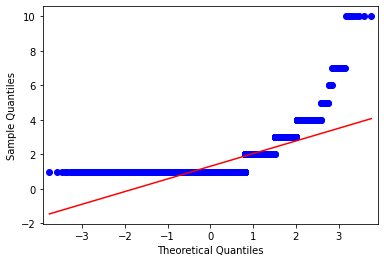

In [33]:
qqplot(train_rem['No_Pol'], line='s')
pyplot.show()

**Feature Extraction from the test set**

In [34]:
test_1.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
Status                    object
dtype: object

In [35]:
#and for the train set
test_1['Newtransact Y/N'] = np.where(test['Policy Start Date'] ==test_1['First Transaction Date'], 'No', 'Yes')
# Now we subtract
test_1['Age of policy'] = pd.to_datetime(test_1['Policy End Date']) - pd.to_datetime(test_1['Policy Start Date'])
test_1['Age of policy'] = test_1['Age of policy'].dt.days.astype(float) + (test_1['Age of policy'].dt.seconds.astype(float) / 86400)
test_1['Newtransact Y/N'] = test_1['Newtransact Y/N'].astype('category')

In [40]:
# Remove variables that were used to create new features
cols_2_remove = ['Policy Start Date','Policy End Date', 'First Transaction Date']
test_rem = train.copy()
test_rem.drop(cols_2_remove, axis = 1, inplace = True)
test_1.drop(cols_2_remove, axis=1, inplace=True)
test_1.drop('ID', axis=1)

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Status,Newtransact Y/N,Age of policy
0,NO GENDER,25,1,Unknown,As Attached,Iveco,Victoria Island,Lagos,CVTP,Test Set,No,337.0
1,Unknown,120,4,Unknown,As Attached,TOYOTA,Victoria Island,Lagos,Muuve,Test Set,No,364.0
2,Female,46,1,Unknown,Unknown,Ford,Abuja Municipal,Abuja-Municipal,Car Classic,Test Set,No,364.0
3,Male,32,1,Unknown,Unknown,Unknown,Kosofe,Benue,Car Classic,Test Set,No,364.0
4,Unknown,120,4,Unknown,Unknown,TOYOTA,Victoria Island,Lagos,Muuve,Test Set,No,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5172,Male,48,1,Saloon,Unknown,Honda,Unknown,Unknown,CarSafe,Test Set,No,364.0
5173,Unknown,50,1,Unknown,Unknown,Unknown,Victoria Island,Lagos,Car Classic,Test Set,No,364.0
5174,Male,1,1,Unknown,Unknown,Unknown,Unknown,Unknown,CarSafe,Test Set,No,364.0
5175,Female,52,1,Saloon,Grey,TOYOTA,Unknown,Unknown,Car Classic,Test Set,No,364.0


In [45]:
train_1 = train_1.drop('ID', axis=1)

In [46]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
combo = train_1.copy()
combo = combo.append(test_1)

**Pre-processing Gender**

In [47]:
train.Gender.unique()

array(['M', 'F', 'O'], dtype=object)

In [48]:
mapper = {"Male":"M","Female":'F','Entity':'O','Joint Gender':'O','Unknown':'O','NO GENDER':'O','NOT STATED':'O','SEX':'O'}
# M for Male, F for Female and O for Others

In [49]:
train.Gender = train.Gender.map(mapper)
test.Gender = test.Gender.map(mapper)

In [ ]:
# pd.get_dummies(all_data)

**Creat Base model**

In [50]:
train_1.shape
test_1.shape
combo.shape

(17256, 13)

In [51]:
# extra checks
list(set(combo.columns.to_list()) ^ set(train_rem.columns.to_list()))

['Status', 'target', 'Newtransact Y/N', 'Age of policy']

In [52]:
X = combo.copy()
St = X['Status']
X.drop('Status', axis = 1, inplace = True)

In [53]:
combo['Status'].value_counts()
#St.value_counts()

Train Set    12079
Test Set      5177
Name: Status, dtype: int64

In [54]:
#Check the distribution of variables
train.target = train.target.astype(int)

In [55]:
sp = train_rem['target']

**Frequency encoding**

In [56]:
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])

In [ ]:
#X[['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']] = X[['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']].astype('category') 

In [57]:
X_cat = X_cat.astype('category')
X_cat.dtypes

Gender                category
Car_Category          category
Subject_Car_Colour    category
Subject_Car_Make      category
LGA_Name              category
State                 category
ProductName           category
ID                    category
dtype: object

In [58]:
X_cat.drop('ID', axis=1, inplace= True)

In [59]:
for i in X_cat:
  X_cat[i] = X_cat[i].cat.codes

In [ ]:
#X_cat.drop(['Gender','Car_Category','Subject_Car_Colour','Subject_Car_Make','LGA_Name','State', 'ProductName'], axis =1, inplace=True )

In [60]:
print("X_encoded = {}\nX_num = {}\nSt = {}".format(X_cat.shape,X_num.shape, St.shape))

X_encoded = (17256, 7)
X_num = (17256, 4)
St = (17256,)


In [61]:
frames = [X_cat, X_num, St]
combo_enc = pd.concat(frames, axis = 1)

In [112]:
X_n = combo_enc[:ntrain]
y_n = combo_enc[ntrain:]

In [63]:
combo_enc['Newtransact Y/N'] = np.where(combo_enc['Newtransact Y/N'] == "No", 0, 1)

In [64]:
print('Combined set is {}'.format(combo_enc.shape))

Combined set is (17256, 12)


In [65]:
train_enc = combo_enc.loc[combo_enc['Status']=='Train Set']
test_enc = combo_enc.loc[combo_enc['Status']=='Test Set']

In [66]:
print('Encoded Train set is {}\nEncoded Test set is {}'.format(train_enc.shape,test_enc.shape))

Encoded Train set is (12079, 12)
Encoded Test set is (5177, 12)


In [67]:
# adding target to Encoded Train set
fr = [train_enc, sp]
train_enc = pd.concat(fr, axis = 1)

In [68]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train_enc[train_enc.target == 0].index
idx_1 = train_enc[train_enc.target == 1].index

# Get original number of records per target value
nb_0 = len(train_enc.loc[idx_0])
nb_1 = len(train_enc.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_1 = int(undersampling_rate*nb_1)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_1))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_1)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)


Rate to undersample records with target=0: 1.232586596385542
Number of records with target=0 after undersampling: 1793


In [69]:
# Return undersample data frame
train_enc = train_enc.loc[idx_list].reset_index(drop=True)

**Frequency Transformer**

In [70]:
X_cat_freq = X_cat.copy()

In [71]:
X_cat_freq.shape
#X_num.shape
#St.shape

(17256, 7)

In [72]:
for c in X_cat_freq.columns.to_list():
    X_cat_freq[c] = X_cat_freq.groupby(c).transform('count')/len(X_cat_freq[c])

In [73]:
frames_freq = [X_cat_freq, X_num, St]
combo_enc_freq = pd.concat(frames_freq, axis = 1)

In [74]:
combo_enc_freq.shape
# All features and Status are together

(17256, 12)

In [75]:
combo_enc_freq['Newtransact Y/N'] = np.where(combo_enc_freq['Newtransact Y/N'] == "No", 0, 1)
#combo_enc_freq

In [76]:
#cut combo_enc_freq by Train and Test. Add target back to the Train portion
train_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Train Set']
test_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Test Set']


In [ ]:
train_freq.shape
sp.shape

(12079,)

In [77]:
# adding target to Encoded Train set
fr = [train_freq, sp]
train_freq = pd.concat(fr, axis = 1)

In [78]:

print("Respective sizes of the train set: {}\nOf the test set: {}\nOf the prices array:{}".format(train_freq.shape,test_freq.shape, sp.shape))

Respective sizes of the train set: (12079, 13)
Of the test set: (5177, 12)
Of the prices array:(12079,)


In [79]:
from sklearn.model_selection import train_test_split
features_freq = train_freq.drop(['target','Status'], axis = 1)
result_freq = train_freq['target']

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(features_freq, result_freq, test_size = 0.33, random_state = 12)

In [80]:
X_train_freq

,Gender,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Age,No_Pol,Newtransact Y/N,Age of policy
625,0.630969,0.311544,0.577596,0.204972,0.536509,0.537552,0.312065,32,1,0,364.0
5645,0.630969,0.499073,0.577596,0.085999,0.003709,0.004520,0.038943,39,1,0,364.0
8763,0.630969,0.311544,0.577596,0.204972,0.536509,0.537552,0.536857,48,1,0,364.0
11193,0.630969,0.311544,0.577596,0.204972,0.536509,0.537552,0.536857,44,1,0,364.0
8082,0.023934,0.002608,0.023528,0.411393,0.004057,0.263676,0.039465,20,1,0,364.0
...,...,...,...,...,...,...,...,...,...,...,...
3714,0.630969,0.499073,0.577596,0.019935,0.536509,0.537552,0.312065,30,1,0,364.0
7409,0.630969,0.499073,0.577596,0.411393,0.536509,0.537552,0.312065,42,1,0,364.0
3325,0.274397,0.499073,0.577596,0.411393,0.536509,0.537552,0.312065,37,1,0,364.0
9606,0.274397,0.166203,0.154613,0.000290,0.096720,0.263676,0.536857,55,2,0,364.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


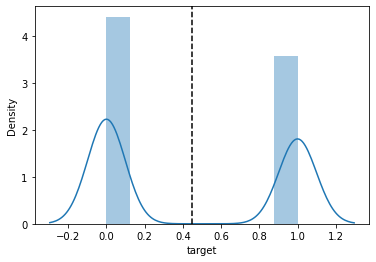

In [81]:
# it is a multi-modal plot have mean about zeros  and ones
sns.distplot(train_enc['target'])
plt.axvline(train_enc['target'].mean(), color="k", linestyle="--")

In [82]:
features = train_enc.drop(['target','Status'], axis = 1)
result = train_enc['target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.33, random_state = 12)

**Machine Learning Part**

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lg = LinearRegression()
lg.fit(X_train, y_train)
prediction_1 = lg.predict(X_test)

In [88]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [89]:
r2_score(y_test, prediction_1)
mean_squared_error(y_test, prediction_1)

323.38295184887875

In [134]:
predicted = lg.predict(y_n)

**Regression and lasso**

In [90]:
print("For the test set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test, prediction_1)),r2_score(y_test, prediction_1)))

For the test set, the mean squared error is 17.982851605039695, and R2 is -129977.60%


In [92]:
from sklearn.linear_model import Lasso

In [93]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test,pred_test_lasso)), r2_score(y_test, pred_test_lasso)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_train,pred_train_lasso)), r2_score(y_train, pred_train_lasso)))

After lasso, for the test set, the mean squared error is 14.810774085707035, and R2 is -88135.01%
After lasso, for the train set, the mean squared error is 0.46566554993340725, and R2 is 12.03%


In [ ]:
# GridSearch for lasso parameters
# Should be done on the whole dataset before the train and test split
from sklearn.model_selection import GridSearchCV

In [ ]:
alp = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max_i = [1000, 1500, 2000, 2500]
param_grid = dict(alpha = alp, max_iter = max_i)
gsc = GridSearchCV(
    estimator = Lasso(),
    param_grid = param_grid)
result_gsc = gsc.fit(features, result)

print("Best score: %f using %s" % (result_gsc.best_score_, result_gsc.best_params_))
means = result_gsc.cv_results_['mean_test_score']
stds = result_gsc.cv_results_['std_test_score']
params = result_gsc.cv_results_['params']

Best score: -0.046743 using {'alpha': 0.08, 'max_iter': 1000}


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
sc = cross_validate(lg, X_train, y_train, scoring='r2', cv=3, return_train_score = True)   
print("R2 Scores are {}\nIts mean is {}".format(sc['test_score'],sc['test_score'].mean()))

R2 Scores are [0.10120437 0.11275678 0.12155915]
Its mean is 0.1118401021768195


In [ ]:
sc = cross_validate(lg, X_train, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

0.11306255569844433


In [ ]:
sc = cross_validate(lg, X_train, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-1.106151592015437


**Linear Regression and Xgboost**

In [95]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import math

In [96]:
regr_freq = LinearRegression()

In [97]:
regr_freq.fit(X_train_freq, y_train_freq)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
print("RMSE is: {:.2f}\nR_squared is {:.2f}%".format(math.sqrt(np.mean((regr_freq.predict(X_test_freq) - y_test_freq) ** 2)),regr_freq.score(X_test_freq,y_test_freq)*100))

RMSE is: 0.32
R_squared is 5.53%


In [99]:
xgb_freq = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [100]:
xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print("The explained variance is {:.2f}".format(explained_variance_score(predictions_xgb_freq,y_test_freq)))

[08:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The explained variance is -3.12


**Grid Search Boost**

In [ ]:
# TAKES TIME
n_estimators = [80, 100, 120, 140, 160]
max_depth = [4, 5, 6, 7, 8, 9, 10]
learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.04]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)
grid_search_xg_freq = GridSearchCV(xgb_freq, param_grid, scoring = 'r2', n_jobs = -1, cv=kfold, verbose = 1)
result_gcv_xgb_freq = grid_search_xg_freq.fit(X_train_freq, y_train_freq.astype(int))

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed: 45.9min finished


[19:25:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print("Best score: %f using %s" % (result_gcv_xgb_freq.best_score_, result_gcv_xgb_freq.best_params_))
means = result_gcv_xgb_freq.cv_results_['mean_test_score']
stds = result_gcv_xgb_freq.cv_results_['std_test_score']
params = result_gcv_xgb_freq.cv_results_['params']


Best score: 0.128667 using {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 160}


In [ ]:
# Rebuilding using the best parameters:
xgb_freq = xgb.XGBRegressor(n_estimators=160, learning_rate=0.04, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=4)

xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print("R squared is {}".format(explained_variance_score(predictions_xgb_freq,y_test_freq)))

[19:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared is -5.6517950882697185


In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_freq, y_train_freq)

pred_train_lasso_freq= model_lasso.predict(X_train_freq)
pred_test_lasso_freq= model_lasso.predict(X_test_freq)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test_freq,pred_test_lasso_freq)), r2_score(y_test_freq, pred_test_lasso_freq)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train_freq,pred_train_lasso_freq)), r2_score(y_train_freq, pred_train_lasso_freq)))

After lasso, for the test set, the mean squared error is 0.3218547376236606, and R2 is 3.39%
After lasso, for the train set, the mean squared error is 0.3185956685544667, and R2 is 3.62%


In [130]:
predicted = model_lasso.predict(y_n)

**Train on full train dataset**

[link text](https://pbpython.com/categorical-encoding.html)    
**Logistic Regression**

In [101]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import math

**Split into test and train**

In [102]:
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(features,result, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.6093255676424901
Test accuracy: 0.5948717948717949


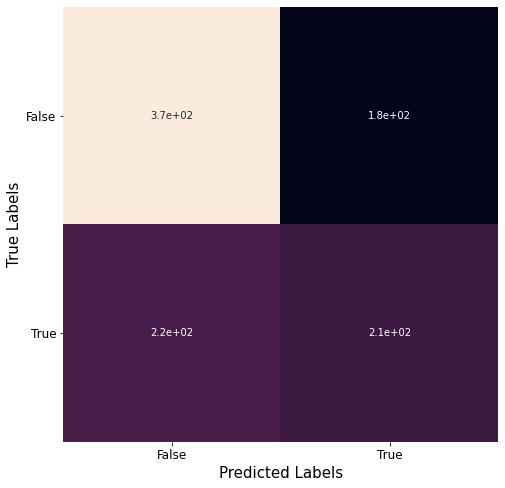

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       549
           1       0.54      0.49      0.52       426

    accuracy                           0.59       975
   macro avg       0.59      0.58      0.58       975
weighted avg       0.59      0.59      0.59       975



In [104]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.5948717948717949
Precision: 0.5398457583547558
Recall: 0.49295774647887325
F1 Score: 0.5153374233128835


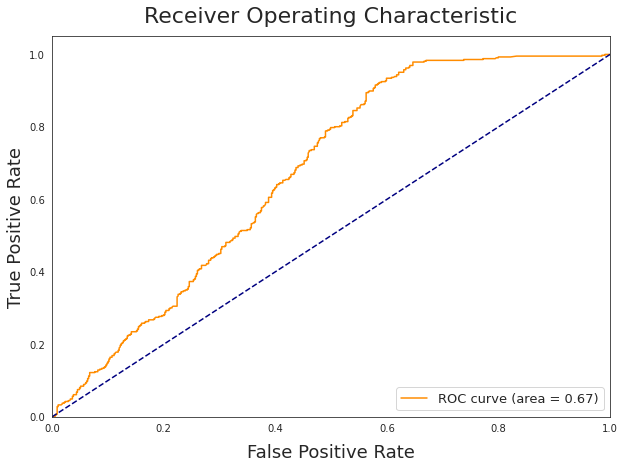

In [105]:
y_pred_prop = final_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

**First Submission File**

In [119]:
y_n = y_n.drop('Status', axis = 1 )
predictions = final_model.predict(y_n)

In [2]:
len(test.ID == predictions)

In [123]:
sub_file = ssn.copy()

In [125]:
submit = pd.DataFrame({'id':test.ID,'target': predictions}) 
submit.to_csv('lr_sumbo.csv',index=False) 